# Selección y regularización de modelos lineales

A pesar de su simplicidad, los modelos lineales tienen ventajas de interpretabilidad y con frecuencia muestran buen rendimiento en predicción

$$
Y = \beta_0+\beta_1X_1+\cdots+\beta_pX_p+\epsilon.
$$


Esta sección aborda el cambiar el ajuste de mínimos cuadrados ordinarios (OLS) tradicional por métodos alternativos que se apalancan en OLS.

**¿Por que usar alternativas a OLS?**

- Predictibilidad: Si la relación entre las variables es aproximadamente lineal y si $n\gg p$ (el número de observaciones es más grande que el número de variables), entonces OLS tiene poco sesgo y rinde bien en datos *test*. Sin embargo, si $n$ no es tan grande respecto a $p$, puede haber mucha variabilidad en OLS, lo que resulta en sobreajuste y mal rendimiento en *test*.

Algunos de los problemas que surgen cuando $n\approx p$:

1. **Sobreajuste (Overfitting)**

El **error cuadrático medio** (MSE) en el conjunto de entrenamiento se define como:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

donde:
- $ y_i $ es el valor observado,
- $ \hat{y}_i $ es la predicción del modelo,
- $ n $ es el número de observaciones.

Cuando el número de variables $p$ se aproxima a $n$, el modelo puede ajustarse casi perfectamente, lo que minimiza el MSE en el conjunto de entrenamiento, pero aumenta el error en nuevos datos (error de generalización). Este es el problema del sobreajuste.

2. **Multicolinealidad**

El **problema de multicolinealidad** se detecta cuando las variables explicativas están altamente correlacionadas entre sí. Un indicador común es el **Factor de Inflación de la Varianza (VIF)** para cada variable $j$, que se define como:

$$
VIF_j = \frac{1}{1 - R_j^2}
$$

donde $ R_j^2 $ es el coeficiente de determinación de la regresión de la variable $ X_j $ sobre todas las demás variables.

Cuando $ VIF_j $ es grande (mayor a 10, por ejemplo), indica una alta colinealidad. Esto causa inestabilidad en las estimaciones de los coeficientes $ \hat{\beta}_j $, lo que puede hacer que el modelo sea sensible a pequeños cambios en los datos.

3. **Modelo No Identificable**

En regresión lineal, los coeficientes de los parámetros $ \boldsymbol{\beta} = (\beta_1, \beta_2, \dots, \beta_p) $ se obtienen resolviendo el sistema de ecuaciones lineales:

$$
\boldsymbol{y} = \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\epsilon}
$$

donde:
- $ \boldsymbol{y} $ es el vector de observaciones (de dimensión $ n \times 1 $),
- $ \mathbf{X} $ es la matriz de diseño (de dimensión $ n \times p $),
- $ \boldsymbol{\beta} $ es el vector de coeficientes,
- $ \boldsymbol{\epsilon} $ es el término de error.

Para resolver $ \boldsymbol{\beta} $, necesitamos invertir la matriz $ \mathbf{X}^T \mathbf{X} $. Si $ p \geq n $, la matriz $ \mathbf{X}^T \mathbf{X} $ no es invertible, lo que significa que el sistema es **no identificable** y no existe una única solución para $ \boldsymbol{\beta} $.

$$
\text{Si } \det(\mathbf{X}^T \mathbf{X}) = 0, \text{ entonces no hay solución única.}
$$

4. **Varianza Alta**

Cuando hay más variables que observaciones, el **error estándar** de los coeficientes de regresión se incrementa. La varianza de los coeficientes $ \hat{\beta}_j $ está dada por:

$$
\text{Var}(\hat{\beta}_j) = \sigma^2 \left( (\mathbf{X}^T \mathbf{X})^{-1} \right)_{jj}
$$

donde $ \sigma^2 $ es la varianza del error residual. Si $ \mathbf{X}^T \mathbf{X} $ es mal condicionada (debido a la colinealidad o alta dimensionalidad), los elementos de la matriz inversa $ (\mathbf{X}^T \mathbf{X})^{-1} $ pueden ser muy grandes, lo que resulta en una varianza elevada para $\hat{\beta}_j$. Esto significa que los coeficientes son altamente sensibles a los cambios en los datos.


- Interpretabilidad: Incluir variables independientes sin asociación con la variable dependiente en un modelo de regresión resulta en incluir complejidades innecesarias en el modelo. Si son removidas (se fijan sus coeficientes en cero), se puede obtener un modelo que es más interpretable. En OLS hay muy poca probabilidad de que se tengan coeficientes iguales a cero. Al eliminar variables estamos haciendo selección de variables o *feature selection*: selección de variables, contracción o regularización y reducción de dimensionalidad.



## Selección de variables

### Selección de las mejores variables



| **Algoritmo: Selección de las mejores variables** |
|:------|
| 1. Sea $\mathcal{M_0}$ el modelo nulo (sin predictores). Este modelo solo predice la media muestral para cada observación. |
| 2. Para $k = 1,2,\ldots,p$: <br/>   
<code>&nbsp;</code> a. Ajusta todos ${p \choose k}$ modelos que contienen exactamente $k$ predictores.
<code>&nbsp;</code> b. Selecciona el mejor de los ${p \choose k}$ modelos, nómbralo $\mathcal{M_k}$. El *mejor* modelo se define como aquel que tiene el mejor $RRS$ (suma de residuos al cuadrado), o de manera equivalente el más alto $R^2$.
|
| 3. Selecciona el mejor modelo de los $\mathcal{M_0},\ldots,\mathcal{M_k}$ usando el error de predicción en un conjunto de validación, $C_p$, AIC, BIC o $R^2$ ajustado. O usa el método de validación cruzada. |

- Nota que este algoritmo no puede ser aplicado cuando $p$ es grande.

- También puede tener problemas de estadísticos cuando $p$ es grande. Cuanto mayor sea el espacio de búsqueda, mayor será la posibilidad de encontrar modelos que **se vean bien en los datos de entrenamiento**, aunque podrían no tener **ningún poder predictivo** sobre datos futuros.

- Por lo tanto, un espacio de búsqueda enorme puede dar lugar a un sobreajuste y a una alta varianza de las estimaciones de los coeficientes.

- Por los motivos antes listado, los métodos *stepwise* o *paso a paso* son más atractivos.

**$C_p$ de Mallow**

$$
C_p = \frac{1}{n}(RSS+2d\hat{\sigma}^2)
$$

donde $d$ es el total de parámetros usados y $\hat{\sigma}^2$ es la estimación de la varianza del error $\epsilon$.

**Criterio AIC**

Se puede usar en modelos donde el ajuste se realiza con máxima verosimilitud:

$$
AIC = -2\text{log}L+2d
$$

Donde $L$ es el valor máximo de la función de máxima verosimilitud del modelo.

$$
BIC =  \frac{1}{n}(RSS+\text{log}(n)d\hat{\sigma}^2)
$$

donde $n$ es el número de observaciones.

**$R^2$ ajustado**

$$
R^2_{adj} = 1-\frac{RSS/(n-d-1)}{TSS/(n-1)}
$$

donde $TSS$ es la suma total de cuadrados.

### Selección *stepwise* hacia adelante

| **Algoritmo: Selección *stepwise* hacia adelante** |
|:------|
| 1. Sea $\mathcal{M_0}$ el modelo nulo (sin predictores). Este modelo solo predice la media muestral para cada observación. |
| 2. Para $k = 0,2,\ldots,p-1$: <br/>   
<code>&nbsp;</code> a. Considera todos los $p-k$ modelos que aumentan predictores en $\mathcal{M_k}$ con un predictor adicional.
<code>&nbsp;</code> b. Elige el mejor de estos $p-k$ modelos, y nómbralo $\mathcal{M_{k+1}}$. El *mejor* modelo se define como aquel que tiene el mejor $RRS$, o el más alto $R^2$.
|
| 3. Selecciona el mejor modelo de los $\mathcal{M_0},\ldots,\mathcal{M_k}$ usando el error de predicción en un conjunto de validación, $C_p$, AIC, BIC o $R^2$ ajustado. O usa el método de validación cruzada. |

### Selección *stepwise* hacia atrás

| **Algoritmo: Selección *stepwise* hacia atrás** |
|:------|
| 1. Sea $\mathcal{M_p}$ el modelo completo, que contiene todos los $p$ predictores. |
| 2. Para $k = p,p-1,\ldots,1$: <br/>   
<code>&nbsp;</code> a. Considera todos los $k$ modelos que contienen todos menos uno de los predictores en en $\mathcal{M_k}$, para un total de $k-1$ predictores.
<code>&nbsp;</code> b. Elige el mejor de estos $k$ modelos, y nómbralo $\mathcal{M_{k-1}}$. El *mejor* modelo se define como aquel que tiene el mejor $RRS$, o el más alto $R^2$.
|
| 3. Selecciona el mejor modelo de los $\mathcal{M_0},\ldots,\mathcal{M_k}$ usando el error de predicción en un conjunto de validación, $C_p$, AIC, BIC o $R^2$ ajustado. O usa el método de validación cruzada. |

#### Ejemplo


La superintendencia de compañias del Ecuador tiene información de estados financieros de las empresas que regula. Vamos a predecir los ingresos por ventas de las empresas grandes del 2023. En la pestaña *Recursos* del siguiente enlace: https://appscvsmovil.supercias.gob.ec/ranking/reporte.html


In [6]:
import pandas as pd
import statsmodels.api as sm

uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/refs/heads/master/superciasGrandes2023.csv"
datos = pd.read_csv(uu)
datos.drop(columns = ['Unnamed: 0'],inplace = True)

# Supongamos que 'X' es tu conjunto de características y 'y' la variable dependiente.
X = datos.loc[:,datos.columns!='ingresos_ventas']  # tus datos de características
y = datos['ingresos_ventas']  # tu variable dependiente


start_model = sm.OLS(y, X).fit()
print(start_model.summary())

                                 OLS Regression Results                                
Dep. Variable:        ingresos_ventas   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.988e+05
Date:                Tue, 24 Sep 2024   Prob (F-statistic):                        0.00
Time:                        05:28:55   Log-Likelihood:                         -46254.
No. Observations:                2969   AIC:                                  9.260e+04
Df Residuals:                    2925   BIC:                                  9.286e+04
Df Model:                          44                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

Modelo hacia adelante:

In [9]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
# Crear el metodo para modelo de regresión lineal
model = LinearRegression()

# Crear un selector de características secuencial
sfs = SequentialFeatureSelector(model, n_features_to_select='auto', direction='forward')

# Ajustar el modelo
sfs.fit(X, y)

# Ver las características seleccionadas
selected_features = sfs.get_support()

# Ajustar el modelo final con las características seleccionadas
X_selected = X.loc[:, selected_features]
final_model = sm.OLS(y, X_selected).fit()

# Mostrar el resumen del modelo final
print(final_model.summary())


                                 OLS Regression Results                                
Dep. Variable:        ingresos_ventas   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.077e+05
Date:                Tue, 24 Sep 2024   Prob (F-statistic):                        0.00
Time:                        05:30:34   Log-Likelihood:                         -46443.
No. Observations:                2969   AIC:                                  9.293e+04
Df Residuals:                    2947   BIC:                                  9.306e+04
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

Modelo hacia atrás

In [10]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
# Crear el metodo para modelo de regresión lineal
model = LinearRegression()

# Crear un selector de características secuencial
sfs = SequentialFeatureSelector(model, n_features_to_select='auto', direction='backward')

# Ajustar el modelo
sfs.fit(X, y)

# Ver las características seleccionadas
selected_features = sfs.get_support()

# Ajustar el modelo final con las características seleccionadas
X_selected = X.loc[:, selected_features]
final_model = sm.OLS(y, X_selected).fit()

# Mostrar el resumen del modelo final
print(final_model.summary())


                                 OLS Regression Results                                
Dep. Variable:        ingresos_ventas   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.069e+05
Date:                Tue, 24 Sep 2024   Prob (F-statistic):                        0.00
Time:                        05:31:27   Log-Likelihood:                         -46444.
No. Observations:                2969   AIC:                                  9.293e+04
Df Residuals:                    2947   BIC:                                  9.306e+04
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

## Regularización

La regularización es un método que nos permite restringir el proceso de estimación, se usa para evitar un posible sobre ajuste del modelo (*overfitting*).

Una forma de hacer regularización es donde los coeficientes de variables en el modelo no sean muy grandes (regresión *ridge*). Otra forma es contraer los coeficientes, llegando a tener coeficientes iguales a cero (regresión *lasso*).

Como regla general, el segundo enfoque suele ser mejor que el primero. 

Los coeficientes regularizados se obtiene usando una función de penalidad $p(\boldsymbol{\alpha})$ para restringir el tamaño del vector de coeficientes $\boldsymbol{\alpha} = (\alpha_1,\cdots,\alpha_M)^T$ del predictor $f(\mathbf{x}) = \sum_{j = 1}^{M} \alpha_jC_j(\mathbf{x})$. Los coeficientes penalizados son obtenidos como solución al problema de minimización:


$$
\hat{\boldsymbol{\alpha}}_{\lambda}= \underset{\boldsymbol{\alpha}}{\mathrm{argmin}} = \left\{\sum_{i = 1}^{n}L(y_i,f(\mathbf{x}_i))+\lambda p(\boldsymbol{\alpha}) \right\},
$$
donde $L$ es una función de pérdida y $\lambda>0$ es un parámetro de regularización también conocido como *ratio de aprendizaje*.

Existen diferentes opciones para funciones de pérdida:

-   Exponencial:

$$
L(y,f(\mathbf{x})) = e^{-yf(\mathbf{x})}, y \in \{-1,+1\}.
$$

-   Logística:


$$
L(y,f_t(\mathbf{x})) = \text{log}\{1+ e^{-2yf_t(\mathbf{x})}\},y \in \{-1,+1\}.
$$

-   Error cuadrático:


$$
L(y,f_t(\mathbf{x})) = \frac{1}{2}(y-f_t(\mathbf{x}))^2, y \in \mathcal{R}.
$$


-   Error absoluto:


$$
L(y,f_t(\mathbf{x})) =  |y-f_t(\mathbf{x})|, y \in \mathcal{R}.
$$


-   Huber


$$
L(y,f_t(\mathbf{x})) = \begin{cases}
\frac{1}{2}(y-f_t(\mathbf{x}))^2, & \text{if } |y-f_t(\mathbf{x})|\leq\delta,\\
\delta(|y-f_t(\mathbf{x})|-\delta/2), & \text{en otro caso.}
\end{cases}
$$


<img src="images/L1_fig1.png" width="500" height="300">


Hay dos tipos de funciones de penalidad:

-   $L_2$: esta función de penalidad restringe la suma de cuadrados de los coeficientes,

$$
p_2(\boldsymbol{\alpha})=\sum_{j = 1}^{M} \alpha_j^2.
$$
Cuando $L$ combinado es una combinación convexa y usamos la pérdida de error cuadrático, el predictor de regresión penalizado óptimo es el estimador de regresión *ridge*.



-   $L_1$: Los coeficientes se restringen tal que su suma de valores absolutos,

$$
p_1(\boldsymbol{\alpha})=\sum_{j = 1}^{M} |\alpha_j|.
$$
sea menor que un valor dado. La evidencia empírica sugiere que la penalización $L_1$ (*lasso*) funciona mejor cuando hay un número pequeño o mediano de coeficientes verdaderos de tamaño moderado.



### Regresión *Ridge*

En mínimos cuadrados ordinarios, las estimaciones de $\beta_0,\beta_1,\ldots,\beta_p$ se obtienen minimizando

$$
\text{RSS} = \sum_{i = 1}^n\left(y_i-\beta_0-\sum_{j=1}^p \beta_jx_{ij}\right)^2.
$$

La **regresión *ridge*** es muy similar al enfoque de mínimos cuadrados, pero los coeficientes de la regresión *ridge* $\hat{\beta}^R$ son los valores que minimizan

$$
\sum_{i = 1}^n\left(y_i-\beta_0-\sum_{j=1}^p \beta_jx_{ij}\right)^2+\lambda\sum_{j = 1}^{p} \beta_j^2 = \text{RSS}+\lambda\sum_{j = 1}^{p} \beta_j^2,
$$

donde $\lambda$ es un parámetro ajustable que se determina de manera separada. La influencia de la regularización se controla con $\lambda$. Valores altos de  $\lambda$ significa más regularización y modelos más simples. Sin embargo, la regresión `ridge` siempre generará un modelo que incluya todos los predictores. Incrementar el valor de $\lambda$ tenderá a reducir las magnitudes de los coeficientes, pero no resultará en la exclusión de ninguna de las variables. Notemos que la penalidad no se aplica a $\beta_0$.

### Regresión *Lasso*


$$
\sum_{i = 1}^n\left(y_i-\beta_0-\sum_{j=1}^p \beta_jx_{ij}\right)^2+\lambda\sum_{j = 1}^{p} |\beta_j| = \text{RSS}+\lambda\sum_{j = 1}^{p} |\beta_j|,
$$

La penalización $L_1$ tiene el efecto de forzar algunas de las estimaciones de coeficientes a ser **exactamente iguales a cero** cuando el parámetro $\lambda$ de ajuste es suficientemente grande. Por lo tanto, *lasso* realiza **selección de variables**. Como resultado, los modelos generados a partir de *lasso* son generalmente mucho más **fáciles de interpretar** que los producidos por regresión *ridge*. Decimos que *lasso* produce modelos dispersos (*sparse*), es decir, modelos que involucran solo un subconjunto de variables predictoras.

#### Ejemplo

In [12]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear modelos de Ridge y Lasso
ridge = Ridge(alpha=1.0)  # Alpha controla la penalización
lasso = Lasso(alpha=1000.0)
regOLS = LinearRegression()

# Entrenar los modelos
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)
regOLS.fit(X_train_scaled, y_train)

# Predicciones
y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_lasso = lasso.predict(X_test_scaled)
y_pred_ols = regOLS.predict(X_test_scaled)

# Calcular el error cuadrático medio (MSE)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)/1000000
mse_lasso = mean_squared_error(y_test, y_pred_lasso)/1000000
mse_ols = mean_squared_error(y_test, y_pred_ols)/1000000

# Resultados
print(f"MSE Ridge: {mse_ridge:.2f}")
print(f"MSE Lasso: {mse_lasso:.2f}")
print(f"MSE OLS: {mse_ols:.2f}")

MSE Ridge: 1424589.67
MSE Lasso: 1400394.87
MSE OLS: 1392299.62


In [13]:
# Mostrar coeficientes con nombres
ridge_coefficients = pd.DataFrame(ridge.coef_, index=X.columns, columns=['Ridge Coefficients'])
lasso_coefficients = pd.DataFrame(lasso.coef_, index=X.columns, columns=['Lasso Coefficients'])
ols_coefficients = pd.DataFrame(regOLS.coef_, index=X.columns, columns=['OLS Coefficients'])

# Combinar coeficientes en un solo DataFrame
coefficients = pd.concat([ridge_coefficients, lasso_coefficients,ols_coefficients], axis=1)
print("\nCoeficientes:")
print(coefficients)


Coeficientes:
                           Ridge Coefficients  Lasso Coefficients  \
activos                          2.582039e+05        0.000000e+00   
patrimonio                       2.274355e+05        3.544481e+05   
utilidad_an_imp                  1.539821e+05        1.839588e+05   
impuesto_renta                   8.266122e+05        7.247865e+05   
n_empleados                     -1.496175e+04       -5.113620e+04   
utilidad_ejercicio               1.627621e+07        1.657677e+07   
utilidad_neta                    5.537558e+05        3.410551e+05   
liquidez_corriente              -1.662377e+05        0.000000e+00   
prueba_acida                     2.045903e+05        3.428472e+04   
end_activo                       3.115598e+04        4.094345e+04   
end_patrimonial                  7.625241e+05        3.462532e+04   
end_activo_fijo                 -3.112379e+04        0.000000e+00   
end_corto_plazo                 -1.463793e+05       -0.000000e+00   
end_largo_plazo    

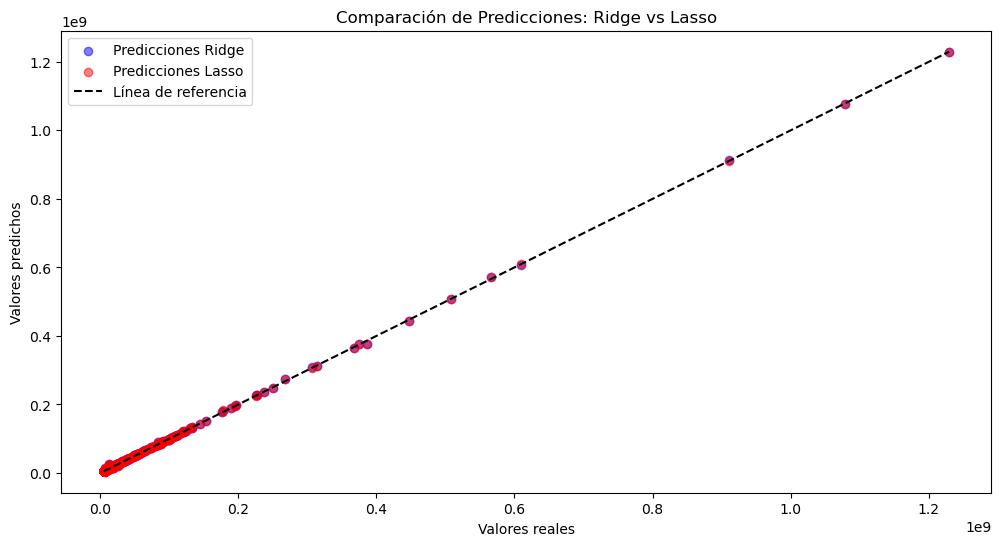

In [14]:
# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_ridge, color='blue', label="Predicciones Ridge", alpha=0.5)
plt.scatter(y_test, y_pred_lasso, color='red', label="Predicciones Lasso", alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label="Línea de referencia")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Comparación de Predicciones: Ridge vs Lasso")
plt.legend()
plt.show()